# Welcome to CS4243 Tutorial 1 Lecture 3
In this tutorial, we will walk through some examples for edge detection. 

You can opt to use images provided it the zipped folder or use your own image to run demo.

### Part 1
**Edge Extraction**

We know that differentiation can be used to extract edge. However, it is very sensitive to noise. We therefore utilize DoG(Derivative of Gaussian) filter with smoothing.

In [1]:
# Import the necessary packages that will be used in the following implementation
import cv2
import matplotlib.pyplot as plt
import numpy as np

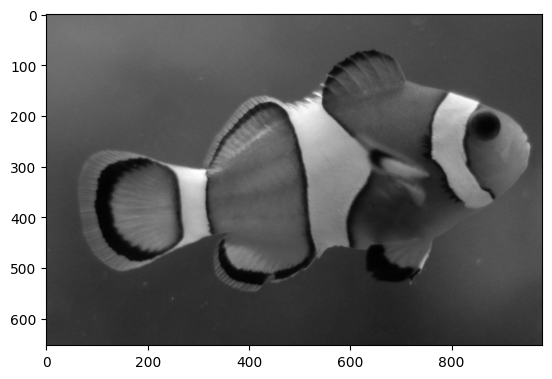

In [2]:
# Reading the image for edge extraction
img = cv2.imread('Input-Files/Nemo.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')
h, w = img.shape


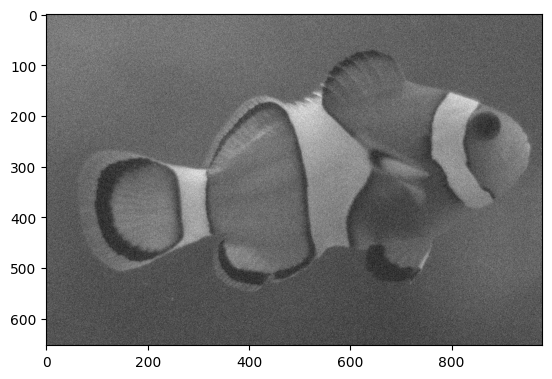

In [3]:
# Add Gaussian noise with μ=0 and σ=20 to the image Nemo.jpeg to produce a noisy image 

##################Your code here#########################
gn_img = img + np.random.normal(0, 20, (h, w))



##################Your code here#########################

plt.imshow(gn_img, cmap='gray')

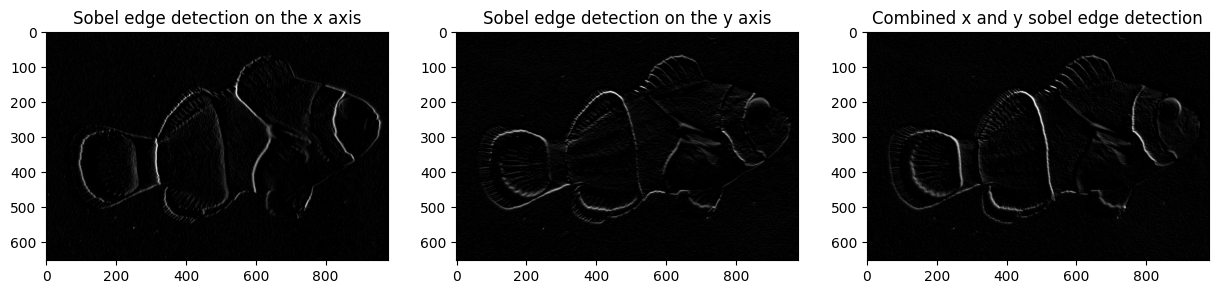

In [4]:
# Sobel Edge Detection with size of 3 on x, y and xy axis, respectively

##################Your code here#########################
sobel_x = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

sobel_y = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

sobel_xy = np.array([
    [ 0,  1,  2],
    [-1,  0,  1],
    [-2, -1,  0]
])

img_sobelx = cv2.filter2D(img, -1, sobel_x)
img_sobely = cv2.filter2D(img, -1, sobel_y)
img_sobelxy = cv2.filter2D(img, -1, sobel_xy)



##################Your code here#########################


plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title('Sobel edge detection on the x axis')
plt.imshow(img_sobelx, cmap = 'gray')
plt.subplot(1,3,2)
plt.title('Sobel edge detection on the y axis')
plt.imshow(img_sobely, cmap = 'gray')
plt.subplot(1,3,3)
plt.title('Combined x and y sobel edge detection')
plt.imshow(img_sobelxy, cmap = 'gray')

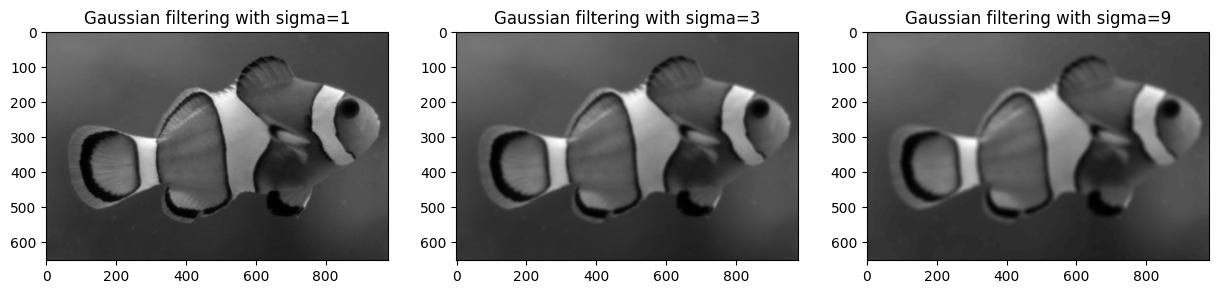

In [9]:
# Smooth the noisy image with a Gaussian filter of size=15 and sigma=1/3/9  

##################Your code here#########################
def get_gaussian_kernel(size, sigma):
    x = np.linspace(-size / 2, size / 2, size)
    y = np.copy(x)
    xv, yv = np.meshgrid(x, y)
    out = (1 / (2 * np.pi * sigma ** 2)) * np.exp(-(xv ** 2 + yv ** 2) / (2 * sigma ** 2))
    return out

g1 = get_gaussian_kernel(15, 1)
g3 = get_gaussian_kernel(15, 3)
g9 = get_gaussian_kernel(15, 9)
img_blur1 = cv2.filter2D(img, -1, g1)
img_blur2 = cv2.filter2D(img, -1, g3)
img_blur3 = cv2.filter2D(img, -1, g9)



##################Your code here#########################

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title('Gaussian filtering with sigma=1')
plt.imshow(img_blur1, cmap = 'gray')
plt.subplot(1,3,2)
plt.title('Gaussian filtering with sigma=3')
plt.imshow(img_blur2, cmap = 'gray')
plt.subplot(1,3,3)
plt.title('Gaussian filtering with sigma=9')
plt.imshow(img_blur3, cmap = 'gray')

In [ ]:
# Apply the built-in cv2.Sobel with size of 3 to the different smoothed images on the x-axis and compare the outputs.  Are there any differences in the extracted edges?

##################Your code here#########################
img_DoG1 = cv2.Sobel(img_blur1, -1, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
img_DoG2 = cv2.Sobel(img_blur2, -1, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
img_DoG3 = cv2.Sobel(img_blur3, -1, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)




##################Your code here#########################

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.title('DoG filter with sigma=1')
plt.imshow(img_DoG1, cmap = 'gray')
plt.subplot(1,3,2)
plt.title('DoG filter with sigma=3')
plt.imshow(img_DoG2, cmap = 'gray')
plt.subplot(1,3,3)
plt.title('DoG filter with sigma=9')
plt.imshow(img_DoG3, cmap = 'gray')

The given image is smoothed using a Gaussian kernel of certain width sigma=1,3,9. We can see wider detected edges as the sigma increases.

### Part 2
**Canny Edge Detection**

We will see some examples about Canny Edge Detector.



In [ ]:
# Read the original image and resize
dummy_image = cv2.imread('Input-Files/Pole.png')
dummy_image = cv2.cvtColor(dummy_image, cv2.COLOR_BGR2GRAY)

# Apply cv2.Canny with using {50, 100} as {threshold1, threshold2}
##################Your code here#########################



##################Your code here#########################

fig = plt.figure(figsize=(10,4))
plt.subplot(121),plt.imshow(dummy_image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [ ]:
# Compare edge outputs when thresholds = {50, 100}, {80, 100} and {50, 300} 
##################Your code here#########################




##################Your code here#########################

fig = plt.figure(figsize=(15,4))
plt.subplot(131),plt.imshow(edge1,cmap = 'gray')
plt.title('Threshold=[50,100]'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edge2,cmap = 'gray')
plt.title('Threshold=[80,100]'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(edge3,cmap = 'gray')
plt.title('Threshold=[50,300]'), plt.xticks([]), plt.yticks([])